In [1]:
#1 Database Connectivity
import mysql.connector
import pandas as pd

# Database connection
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Sparrow@3210",
    database='ecommerce'
)

# Create a cursor object
cursor = connection.cursor()

# Fetching data from the 'customer' table
cursor.execute('SELECT * FROM customer')
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Fetching data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Fetching data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Closing the connection
cursor.close()
connection.close()

# Displaying the first 5 records of each table
print(customer_data.head())
print(product_data.head())
print(order_data.head())

  customer_id        name         city                  email    phone_no  \
0        C001    John Doe     New York    johndoe@example.com  1234567890   
1        C002  Jane Smith  Los Angeles  janesmith@example.com  0987654321   

       address  pin_code  
0  123 6th Ave     10001  
1  456 7th Ave     90001  
  product_id product_name     category sub_category  original_price  \
0       P001    Product 1  Electronics       Mobile           300.0   
1       P002    Product 2      Apparel      T-Shirt            20.0   

   selling_price  stock  
0          250.0     50  
1           15.0    200  
   order_id customer_id product_id  quantity  total_price payment_mode  \
0         1        C001       P001       2.0        500.0  Credit Card   
1         2        C002       P002       3.0         45.0       PayPal   

           order_date order_status  
0 2024-08-20 12:34:56    Delivered  
1 2024-08-21 14:22:33      Pending  


In [2]:
#2. Data Cleaning
# Check for missing values
print(customer_data.isnull().sum())
print(product_data.isnull().sum())
print(order_data.isnull().sum())

# Converting data types if necessary
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Handling outliers (example: removing negative prices)
product_data = product_data[product_data['selling_price'] >= 0]

# Display cleaned data
print(customer_data.info())
print(product_data.info())
print(order_data.info())

customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64
product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64
order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  2 non-null      object
 1   name         2 non-null      object
 2   city         2 non-null      object
 3   email        2 non-null      object
 4   phone_no     2 non-null      object
 5   address      2 non-null      object
 6   pin_code     2 non-null      int64 
dtypes: int64(1), object(6)
memory usage: 244.0+ bytes
None
<class 'pandas.core.frame.Dat

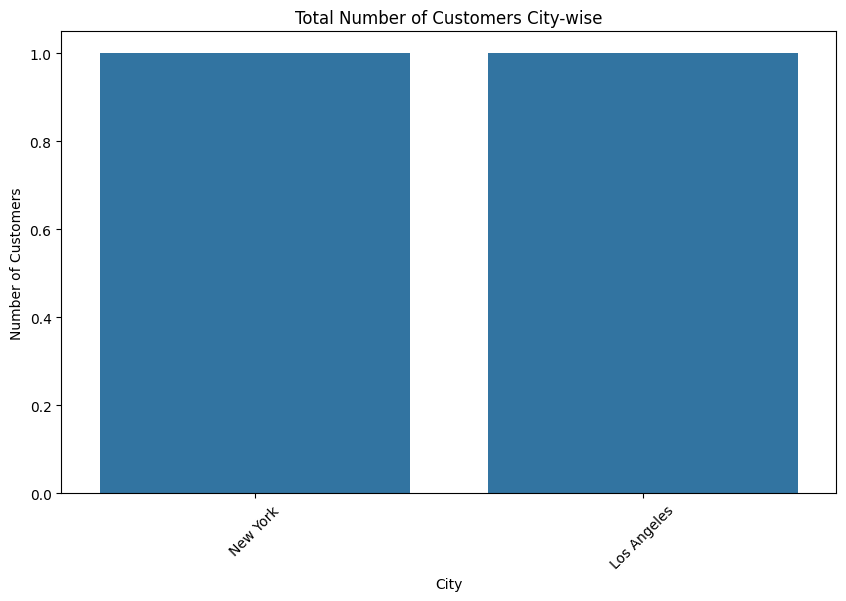

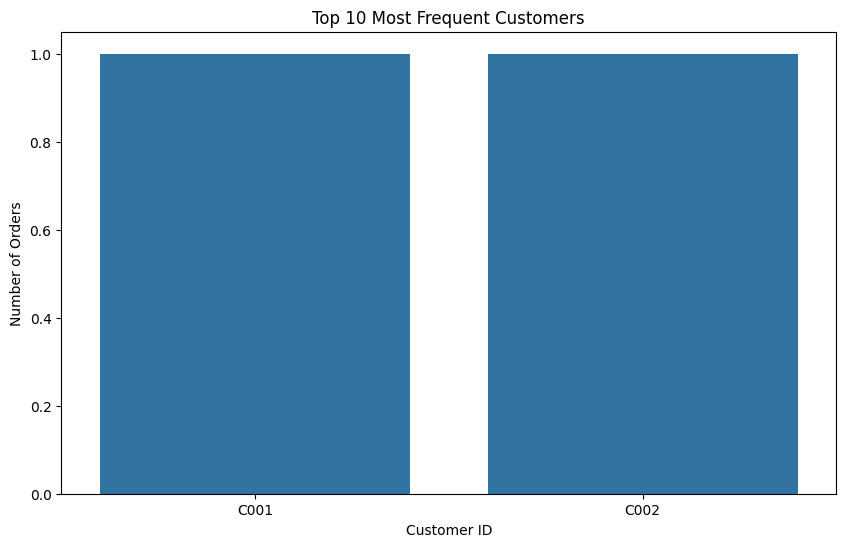

In [3]:
#3. Exploratory Data Analysis (EDA) and Visualization

#3.1 Customer Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Total number of customers city-wise
citywise_customers = customer_data['city'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=citywise_customers.index, y=citywise_customers.values)
plt.title('Total Number of Customers City-wise')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Most frequent customers based on order history
most_frequent_customers = order_data['customer_id'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=most_frequent_customers.index, y=most_frequent_customers.values)
plt.title('Top 10 Most Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.show()

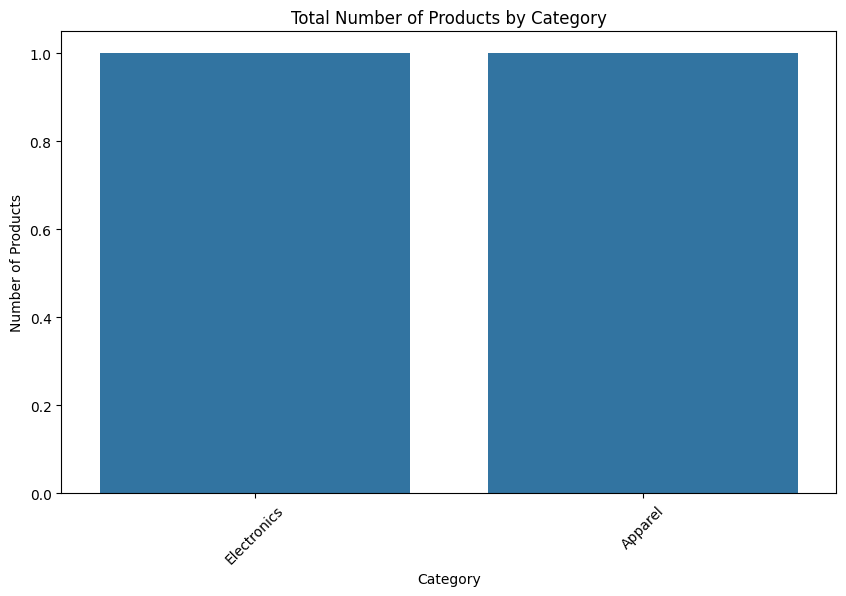

Products with Low Stock Levels:
 Empty DataFrame
Columns: [product_id, product_name, stock]
Index: []
Price Statistics:
 mean    132.5
max     250.0
min      15.0
Name: selling_price, dtype: float64


In [4]:
#3.2 Product Analysis
# Total number of products available by category
categorywise_products = product_data['category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=categorywise_products.index, y=categorywise_products.values)
plt.title('Total Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

# Products with low stock levels
low_stock_products = product_data[product_data['stock'] < 10]
print("Products with Low Stock Levels:\n", low_stock_products[['product_id', 'product_name', 'stock']])

# Average, maximum, and minimum selling prices for products
price_stats = product_data['selling_price'].agg(['mean', 'max', 'min'])
print("Price Statistics:\n", price_stats)

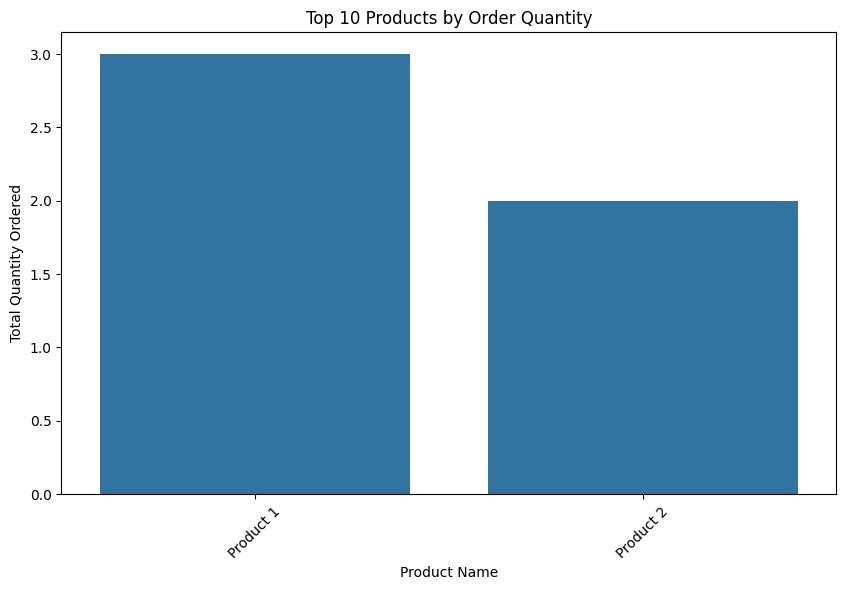

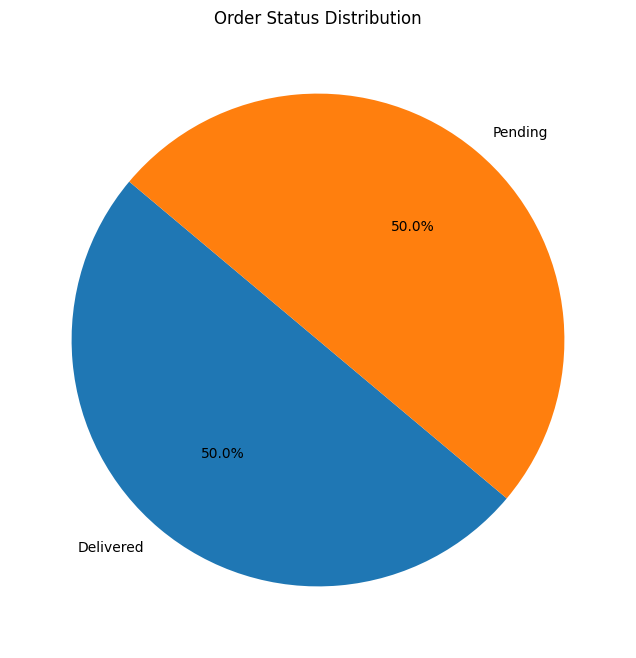

In [7]:
#3.3 Order Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 orders product-wise (by quantity)
top_orders = order_data.groupby('product_id')['quantity'].sum().nlargest(10)
top_products = product_data[product_data['product_id'].isin(top_orders.index)]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products['product_name'], y=top_orders.values)
plt.title('Top 10 Products by Order Quantity')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

# Order status distribution
order_status_distribution = order_data['order_status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(order_status_distribution, labels=order_status_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Order Status Distribution')
plt.show()

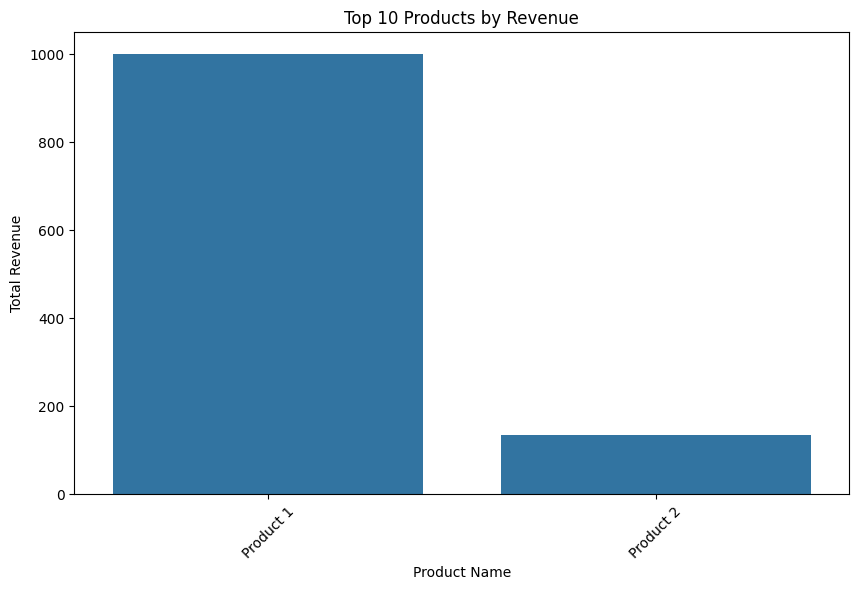

In [8]:
#3.4 Sales Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure total_price is correctly used for revenue calculation
order_data['revenue'] = order_data['quantity'] * order_data['total_price']

# Group by product_id to sum up revenue
product_revenue = order_data.groupby('product_id')['revenue'].sum()

# Get top 10 products by revenue
top_revenue_products = product_data[product_data['product_id'].isin(product_revenue.nlargest(10).index)]

# Plotting the top 10 products by revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=top_revenue_products['product_name'], y=product_revenue.nlargest(10).values)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

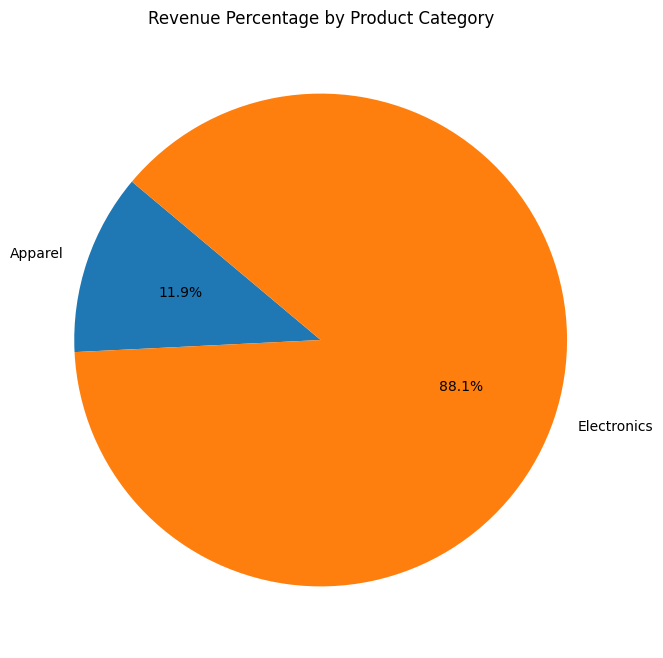

In [9]:
# Merge order data with product data to get category-wise revenue
category_revenue = order_data.merge(product_data, on='product_id').groupby('category')['revenue'].sum()

# Calculate percentage revenue per category
category_revenue_percentage = category_revenue / category_revenue.sum() * 100

# Plotting the revenue percentage by product category
plt.figure(figsize=(8, 8))
plt.pie(category_revenue_percentage, labels=category_revenue_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Percentage by Product Category')
plt.show()

In [10]:
#3.5 Customer Order Patterns
# Product names with highest and lowest order quantities
product_order_quantity = order_data.groupby('product_id')['quantity'].sum()
most_ordered_product = product_data[product_data['product_id'] == product_order_quantity.idxmax()]
least_ordered_product = product_data[product_data['product_id'] == product_order_quantity.idxmin()]

print(f"Most Ordered Product: {most_ordered_product['product_name'].values[0]}")
print(f"Least Ordered Product: {least_ordered_product['product_name'].values[0]}")

# Customers with highest and lowest order quantities
customer_order_quantity = order_data.groupby('customer_id')['quantity'].sum()
most_ordering_customer = customer_data[customer_data['customer_id'] == customer_order_quantity.idxmax()]
least_ordering_customer = customer_data[customer_data['customer_id'] == customer_order_quantity.idxmin()]

print(f"Most Ordering Customer: {most_ordering_customer['name'].values[0]}")
print(f"Least Ordering Customer: {least_ordering_customer['name'].values[0]}")

Most Ordered Product: Product 2
Least Ordered Product: Product 1
Most Ordering Customer: Jane Smith
Least Ordering Customer: John Doe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_date  2 non-null      datetime64[ns]
 1   revenue     2 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 164.0 bytes
None
           order_date  revenue
0 2024-08-20 12:34:56   1000.0
1 2024-08-21 14:22:33    135.0
Monthwise Sales Data:
 month
8    1135.0
Name: revenue, dtype: float64


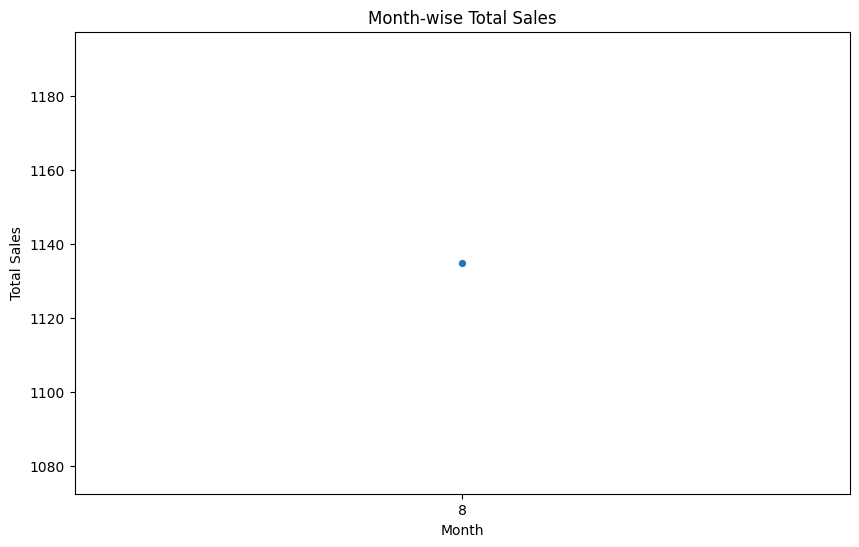

Peak Order Date: 2024-08-21


In [14]:
#3.6 Time-based Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing or incorrect values
print(order_data[['order_date', 'revenue']].info())
print(order_data[['order_date', 'revenue']].head())

# Ensure order_date is in datetime format
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Extract month and calculate month-wise total sales
order_data['month'] = order_data['order_date'].dt.month
monthwise_sales = order_data.groupby('month')['revenue'].sum()

# Check if monthwise_sales is empty or not
print("Monthwise Sales Data:\n", monthwise_sales)

# Plotting Month-wise Total Sales
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthwise_sales.index, y=monthwise_sales.values, marker='o')
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(monthwise_sales.index)  # Ensure the x-axis ticks match the month numbers
plt.show()

# Calculate and print the peak order date
peak_order_date = order_data.groupby(order_data['order_date'].dt.date)['quantity'].sum().idxmax()
print(f"Peak Order Date: {peak_order_date}")

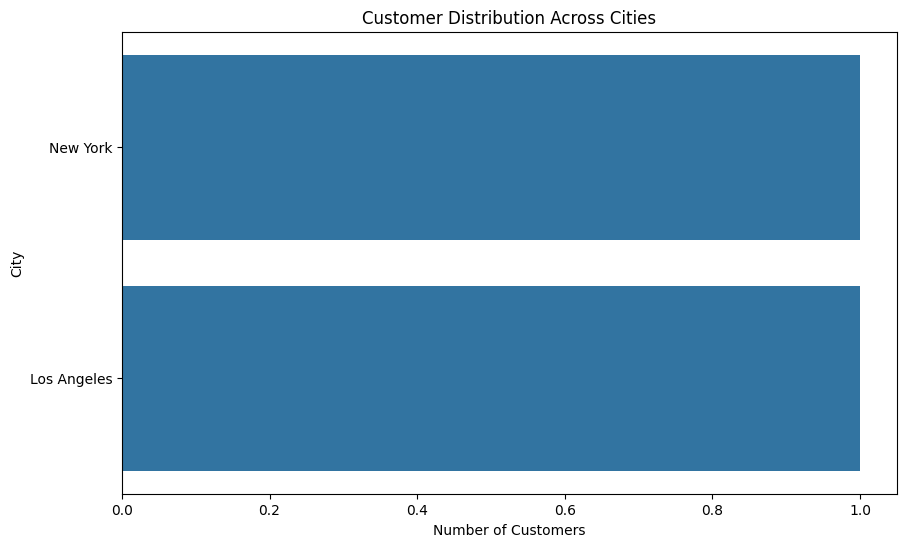

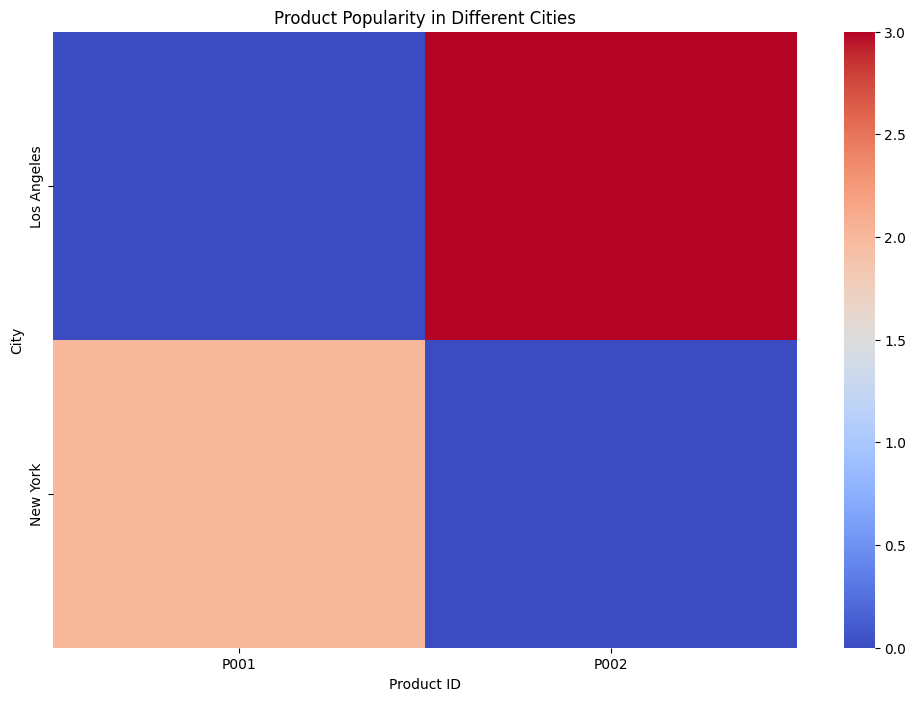

In [15]:
#3.7 Geographical Analysis
# Distribution of customers across different cities
plt.figure(figsize=(10, 6))
sns.countplot(y=customer_data['city'], order=customer_data['city'].value_counts().index)
plt.title('Customer Distribution Across Cities')
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.show()

# Product popularity in different cities
city_product_popularity = order_data.merge(customer_data, on='customer_id').groupby(['city', 'product_id'])['quantity'].sum().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(city_product_popularity, cmap='coolwarm', cbar=True)
plt.title('Product Popularity in Different Cities')
plt.xlabel('Product ID')
plt.ylabel('City')
plt.show()

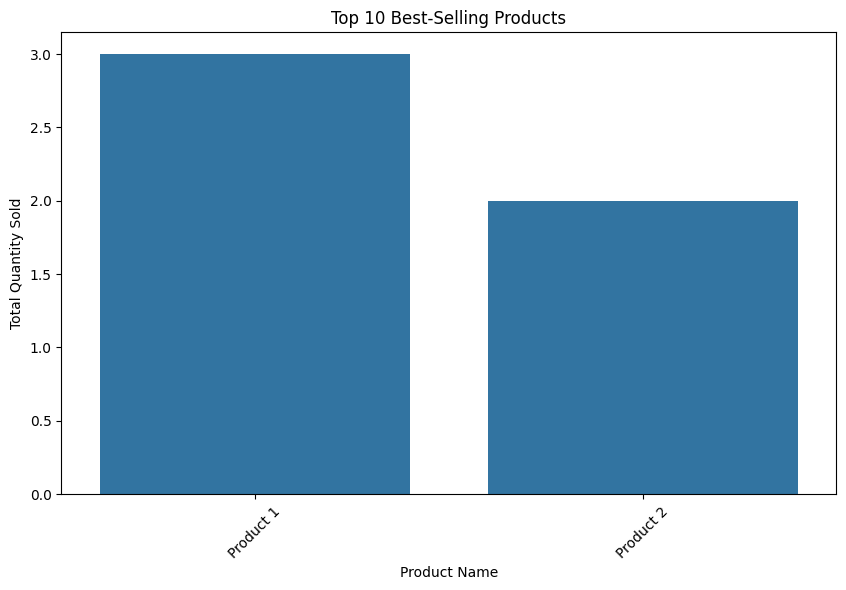

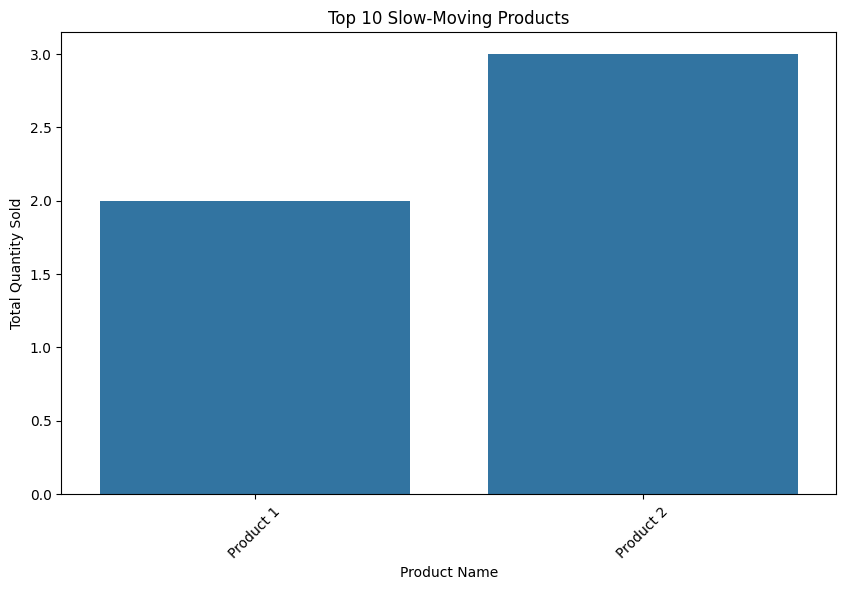

In [16]:
#3.8 Product Performance

# Best-selling products
best_selling_products = product_data[product_data['product_id'].isin(product_order_quantity.nlargest(10).index)]
plt.figure(figsize=(10, 6))
sns.barplot(x=best_selling_products['product_name'], y=product_order_quantity.nlargest(10).values)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Top 10 slow-moving products based on low sales
slow_moving_products = product_data[product_data['product_id'].isin(product_order_quantity.nsmallest(10).index)]
plt.figure(figsize=(10, 6))
sns.barplot(x=slow_moving_products['product_name'], y=product_order_quantity.nsmallest(10).values)
plt.title('Top 10 Slow-Moving Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()